In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
car_details = pd.read_csv("CarPrice.csv")

In [3]:
car_details.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,NaN,NaN,NaN,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,2,3,NaN,NaN,NaN,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,3,1,NaN,NaN,NaN,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,4,2,audi 100 ls,NaN,NaN,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,5,2,audi 100ls,NaN,NaN,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [11]:
car_details['cylindernumber'].describe()

count      204
unique       7
top       four
freq       158
Name: cylindernumber, dtype: object

In [4]:
car_details.isna().sum()

car_ID              0
symboling           0
CarName             3
fueltype            6
aspiration          6
doornumber          0
carbody             1
drivewheel          5
enginelocation      5
wheelbase           5
carlength           5
carwidth            6
carheight           0
curbweight          0
enginetype          0
cylindernumber      1
enginesize          0
fuelsystem          0
boreratio           0
stroke              3
compressionratio    0
horsepower          0
peakrpm             4
citympg             0
highwaympg          0
price               4
dtype: int64

In [20]:
car_details.fillna({'CarName':car_details['CarName'].mode()[0],
                  'fueltype':car_details['fueltype'].mode()[0],
                  'aspiration':car_details['aspiration'].mode()[0],
                  'carbody':car_details['carbody'].mode()[0],
                  'drivewheel':car_details['drivewheel'].mode()[0],
                  'enginelocation':car_details['enginelocation'].mode()[0],
                  'wheelbase':car_details['wheelbase'].mean(),
                   'carlength':car_details['carlength'].mean(),
                   'carwidth':car_details['carwidth'].mean(),
                   'cylindernumber':car_details['cylindernumber'].mode()[0],
                   'stroke':car_details['stroke'].mean(),
                   'CarName':car_details['CarName'].mode()[0],
                    'peakrpm':car_details['peakrpm'].mean(),
                    'price':car_details['price'].mean()},inplace=True)

In [21]:
car_details.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [50]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
for column in car_details.columns:
    if car_details[column].dtype=='object':
        car_details[column]=label_enc.fit_transform(car_details[column])
car_details

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,82,1,0,1,0,2,0,88.600,...,130,5,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,2,3,82,1,0,1,0,2,0,88.600,...,130,5,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,3,1,82,1,0,1,2,2,0,94.500,...,152,5,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,4,2,1,1,0,0,3,1,0,99.800,...,109,5,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,5,2,2,1,0,0,3,0,0,99.400,...,136,5,3.19,3.40,8.0,115,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,136,1,0,0,3,1,0,98.498,...,141,5,3.78,3.15,9.5,114,5400.0,23,28,16845.0
201,202,-1,135,1,1,0,3,1,0,98.498,...,141,5,3.78,3.15,8.7,160,5300.0,19,25,19045.0
202,203,-1,137,1,0,0,3,1,0,98.498,...,173,5,3.58,2.87,8.8,134,5500.0,18,23,21485.0
203,204,-1,139,0,1,0,3,1,0,98.498,...,145,3,3.01,3.40,23.0,106,4800.0,26,27,22470.0


In [51]:
corr_matrix=car_details.corr()
corr_matrix

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.940707,-0.125568,0.067729,-0.190352,0.090679,-0.023224,0.051483,0.059224,...,-0.033930,0.204898,0.260064,-0.158710,0.150276,-0.015006,-0.191393,0.015940,0.011255,-0.129266
symboling,-0.151621,1.000000,-0.073312,0.194311,-0.059866,0.664073,-0.595839,0.023584,0.212471,-0.486785,...,-0.105790,0.091163,-0.130051,-0.012919,-0.178515,0.070873,0.275708,-0.035823,0.034606,-0.078430
CarName,0.940707,-0.073312,1.000000,-0.061141,0.005969,-0.141448,0.026192,-0.048864,0.053698,-0.097357,...,-0.150629,0.153229,0.179128,-0.215412,0.095579,-0.078384,-0.138830,0.073392,0.087828,-0.248964
fueltype,-0.125568,0.194311,-0.061141,1.000000,-0.401397,0.191491,-0.146095,-0.118839,0.040070,-0.305006,...,-0.069594,0.041529,-0.054451,-0.242971,-0.984356,0.163926,0.475310,-0.255963,-0.191392,-0.101336
aspiration,0.067729,-0.059866,0.005969,-0.401397,1.000000,-0.031792,0.060404,0.018790,-0.057191,0.218925,...,0.108217,0.288086,0.212614,0.224362,0.295541,0.241685,-0.179543,-0.202362,-0.254416,0.179629
doornumber,-0.190352,0.664073,-0.141448,0.191491,-0.031792,1.000000,-0.674448,0.139915,0.137757,-0.425342,...,-0.020742,0.015519,-0.119258,0.008886,-0.177888,0.126947,0.243586,0.012417,0.036330,-0.039361
carbody,0.090679,-0.595839,0.026192,-0.146095,0.060404,-0.674448,1.000000,-0.181440,-0.277919,0.392582,...,-0.078470,-0.071522,0.002972,-0.014412,0.135282,-0.159263,-0.102107,0.036767,-0.001165,-0.087943
drivewheel,-0.023224,0.023584,-0.048864,-0.118839,0.018790,0.139915,-0.181440,1.000000,0.155523,0.429874,...,0.509310,0.401150,0.446744,0.089826,0.109602,0.502176,-0.049487,-0.427483,-0.425552,0.541097
enginelocation,0.051483,0.212471,0.053698,0.040070,-0.057191,0.137757,-0.277919,0.155523,1.000000,-0.189710,...,0.196826,0.105971,0.185042,-0.138501,-0.019762,0.317839,0.200247,-0.153487,-0.102026,0.325027
wheelbase,0.059224,-0.486785,-0.097357,-0.305006,0.218925,-0.425342,0.392582,0.429874,-0.189710,1.000000,...,0.568748,0.369708,0.465508,0.191174,0.239749,0.342800,-0.383587,-0.459956,-0.531895,0.550725


In [22]:
x = car_details[['stroke']]
y=car_details[['horsepower']]

In [25]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr=LinearRegression()

In [33]:
lr.fit(x_train,y_train)

LinearRegression()

In [34]:
lr.intercept_

array([92.12530159])

In [35]:
lr.coef_

array([[3.86346356]])

In [37]:
y_pred = lr.predict(x_test)
y_pred

array([[105.22244306],
       [105.26107769],
       [105.53152014],
       [103.98613472],
       [106.18830895],
       [104.8360967 ],
       [105.06790451],
       [103.83159618],
       [102.32484539],
       [105.26107769],
       [105.26107769],
       [103.83159618],
       [104.33384644],
       [105.80196259],
       [105.06790451],
       [103.83159618],
       [103.83159618],
       [107.03827093],
       [105.49288551],
       [102.32484539],
       [105.22244306],
       [104.75882743],
       [104.8360967 ],
       [104.70011043],
       [104.60428889],
       [105.22244306],
       [105.64742405],
       [104.2952118 ],
       [104.8360967 ],
       [104.2952118 ],
       [106.18830895],
       [104.60428889],
       [103.83159618],
       [103.21344201],
       [105.22244306],
       [106.18830895],
       [102.32484539],
       [104.70087548],
       [104.14067326],
       [107.03827093],
       [102.32484539]])

In [42]:
from sklearn.metrics import mean_squared_error,r2_score

In [43]:
mse = mean_squared_error(y_pred,y_test)
mse

1322.5743467039053

In [47]:
r2_score 

<function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)>

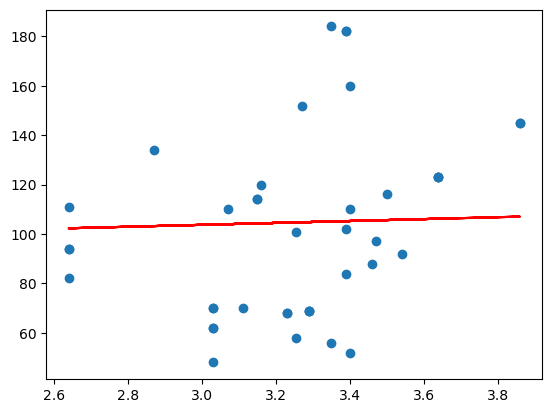

In [46]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')

In [49]:
details_encoded = pd.get_dummies(car_details, drop_first=True)

details_encoded.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,False,False,False,False,False,False,False,True,False,False
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False


In [65]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = car_details[['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 
               'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 
               'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 
               'horsepower', 'peakrpm', 'citympg', 'highwaympg']]
y = car_details['price']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


LR = LinearRegression()
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

In [59]:

LR.coef_

array([577.54710058])

In [60]:
LR.intercept_

11451.938988941136

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Square Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')